<h1><strong>Customer Churn</strong></h1>

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# General Style Settings
sns.set_style("whitegrid")  # Light grid background
sns.set_palette("viridis")  # Color palette
plt.rcParams["figure.figsize"] = (8, 4)  # Default figure size
plt.rcParams["axes.labelsize"] = 12  # Axis label size
plt.rcParams["axes.titlesize"] = 14  # Title size
plt.rcParams["xtick.labelsize"] = 11  # X-axis tick label size
plt.rcParams["ytick.labelsize"] = 11  # Y-axis tick label size
plt.rcParams["legend.fontsize"] = 11  # Legend font size
plt.rcParams["axes.edgecolor"] = "black"  # Border color of the plot
plt.rcParams["grid.alpha"] = 0.5  # Grid line transparency


def customize_plot(title="", xlabel="", ylabel=""):
    """
    Customizes the plot by adding a title, x-axis label, y-axis label,
    and setting grid and rotation properties.
    """
    plt.title(title, fontsize=14, fontweight="bold", color="darkblue")  # Set title
    plt.xlabel(xlabel, fontsize=12, fontweight="bold")  # Set x-axis label
    plt.ylabel(ylabel, fontsize=12, fontweight="bold")  # Set y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True, linestyle="--", alpha=0.6)  # Add dashed grid lines




In [212]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [213]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

#### <span> Understanding the Data</span>


In [214]:
df.sample(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
477   4431-EDMIQ  Female              0     Yes        Yes       7   
3368  1370-GGAWX  Female              0      No         No      46   
1169  1282-IHQAC    Male              1      No         No      70   
4638  7817-BOQPW  Female              0      No         No       2   
1756  0134-XWXCE  Female              1      No         No      44   
2761  2408-WITXK  Female              1      No         No      10   
1305  4945-RVMTE  Female              0      No         No      28   
2180  7375-WMVMT    Male              1     Yes         No      71   
7030  0871-OPBXW  Female              0      No         No       2   
430   9063-ZGTUY  Female              0     Yes        Yes      61   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
477           Yes                No             DSL                  Yes  ...   
3368          Yes               Yes     Fiber optic                   No  ...   
1169           No  No phone service             DSL                   No  ...   
4638          Yes               Yes     Fiber optic                   No  ...   
1756          Yes                No             DSL                   No  ...   
2761           No  No phone service             DSL                   No  ...   
1305          Yes                No             DSL                   No  ...   
2180          Yes                No     Fiber optic                   No  ...   
7030          Yes                No              No  No internet service  ...   
430           Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
477                   Yes                  Yes                  Yes   
3368                  Yes                   No                   No   
1169                  Yes                   No                  Yes   
4638                   No                   No                   No   
1756                  Yes                  Yes                  Yes   
2761                   No                   No                   No   
1305                  Yes                   No                  Yes   
2180                  Yes                  Yes                   No   
7030  No internet service  No internet service  No internet service   
430   No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
477                    No  Month-to-month              Yes   
3368                  Yes        One year              Yes   
1169                   No        One year              Yes   
4638                   No  Month-to-month              Yes   
1756                  Yes        One year               No   
2761                  Yes  Month-to-month              Yes   
1305                   No  Month-to-month              Yes   
2180                  Yes        Two year              Yes   
7030  No internet service  Month-to-month              Yes   
430   No internet service  Month-to-month              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
477            Electronic check          75.70        554.05    No  
3368           Electronic check          94.15       4408.45    No  
1169    Credit card (automatic)          44.05       3011.65    No  
4638           Electronic check          75.55         166.3   Yes  
1756  Bank transfer (automatic)          74.85       3268.05    No  
2761           Electronic check          34.70         329.8   Yes  
1305  Bank transfer (automatic)          59.55       1646.45    No  
2180    Credit card (automatic)          95.50       6707.15    No  
7030               Mailed check          20.05         39.25    No  
430                Mailed check          19.40       1182.55   Yes  

[10 rows x 21 columns]

In [215]:
df.shape

(7043, 21)

In [216]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [218]:
df.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [219]:
df = df.dropna()
df.shape

(7043, 21)

In [220]:
df.duplicated().sum()

0

#### <span>Data Manipulation</span>


In [221]:
df = df.drop("customerID", axis=1)

In [222]:
df[df["TotalCharges"] == ' ']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [223]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [224]:
df[df["TotalCharges"] == ' ']


Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [225]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [226]:
df['TotalCharges'] = df['TotalCharges'].replace([np.inf, -np.inf], np.nan)  
df = df.dropna(subset=['TotalCharges'])  


In [227]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [228]:
def outliers(df):

    for col in df.select_dtypes(include='number').columns:

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]



        print(f"{col} - Outliers:")

        print(f"Number of Outliers: {outliers.shape[0]}")

        print(outliers[[col]])

        print("---------------------------")

In [229]:
outliers(df)

SeniorCitizen - Outliers:
Number of Outliers: 1142
      SeniorCitizen
20                1
30                1
31                1
34                1
50                1
...             ...
7023              1
7029              1
7031              1
7032              1
7041              1

[1142 rows x 1 columns]
---------------------------
tenure - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [tenure]
Index: []
---------------------------
MonthlyCharges - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [MonthlyCharges]
Index: []
---------------------------
TotalCharges - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [TotalCharges]
Index: []
---------------------------


In [230]:
df[df["tenure"] == 0]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [231]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### <span> Data Visualization</span>

In [232]:
def plot_numeric_distributions(df):

    numeric_cols = df.select_dtypes(include=['number']).columns

    num_cols = len(numeric_cols)
    num_rows = (num_cols // 3) + 1

    plt.figure(figsize=(15, 5 * num_rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[col], kde=True, color='blue', bins=30)
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

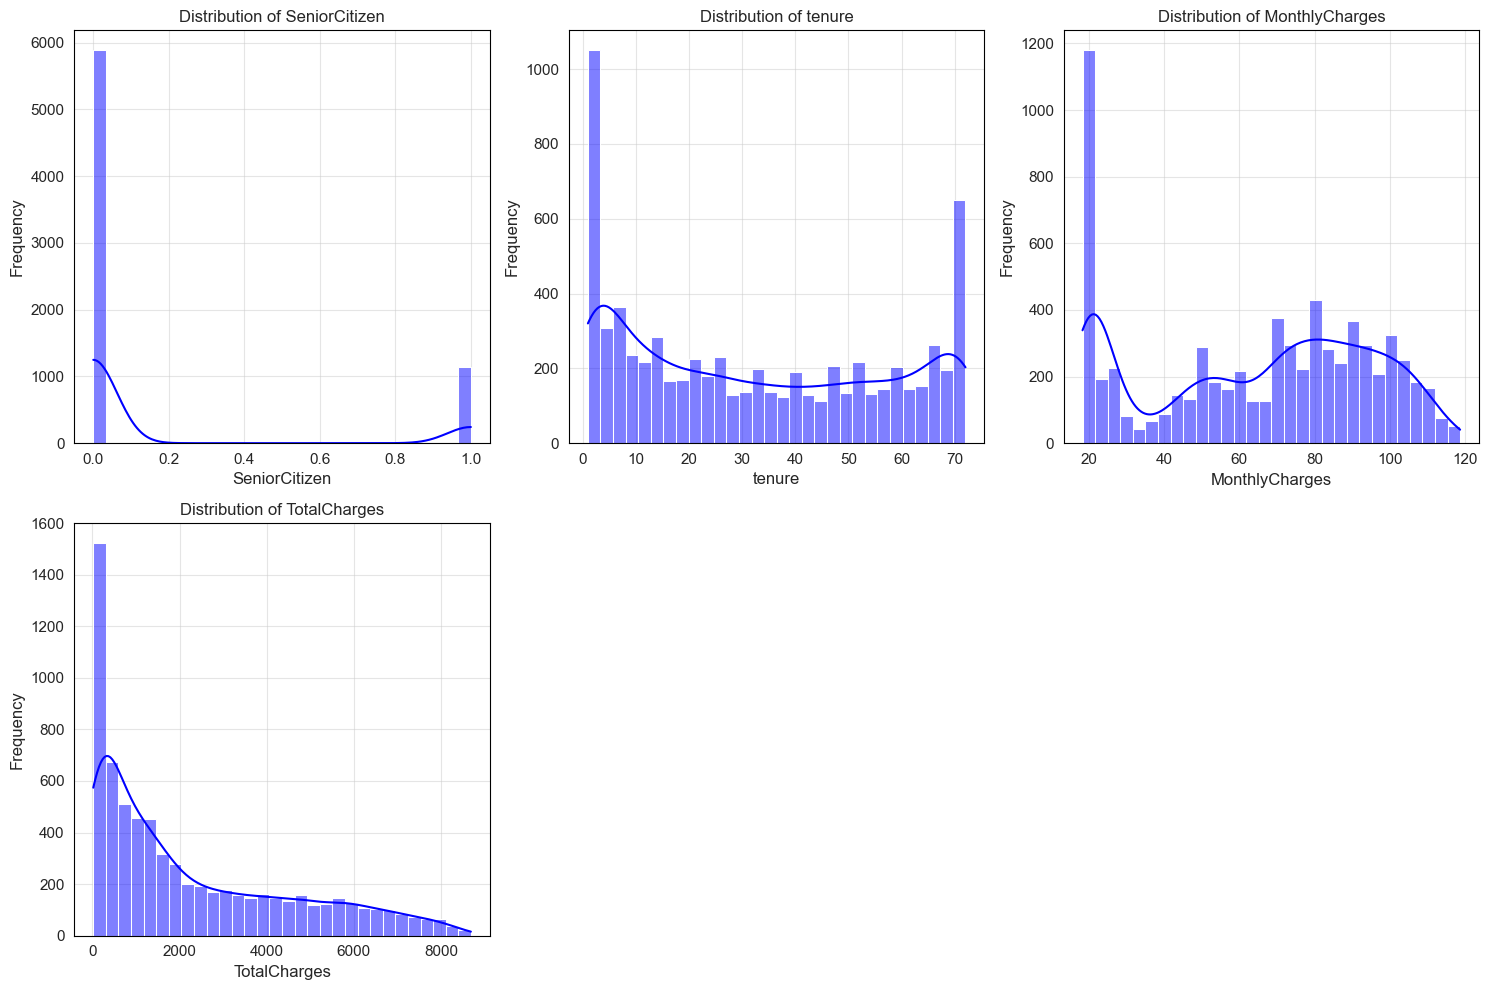

In [233]:
plot_numeric_distributions(df)

In [234]:
def plot_categorical_barcharts(df, max_unique=30):
    # Select categorical columns with less than 15 unique values
    categorical_columns = [
        col for col in df.select_dtypes(include=['object', 'category']).columns
        if df[col].nunique() < max_unique
    ]

    # Get the number of selected categorical columns
    num_columns = len(categorical_columns)

    # If no suitable columns are found, print a warning and exit
    if num_columns == 0:
        print(f"No categorical columns with less than {max_unique} unique values.")
        return

    # Determine the number of rows and columns for the plot layout
    num_rows = math.ceil(num_columns / 3)
    num_cols = min(3, num_columns)

    # Create a grid for subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Plot bar chart for each categorical column
        df[col].value_counts().plot.bar(
            ax=axes[i],
            color='lightblue',
            edgecolor='black'
        )
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('Categories')

    # Remove any extra subplots if the number of columns is not a perfect multiple of 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

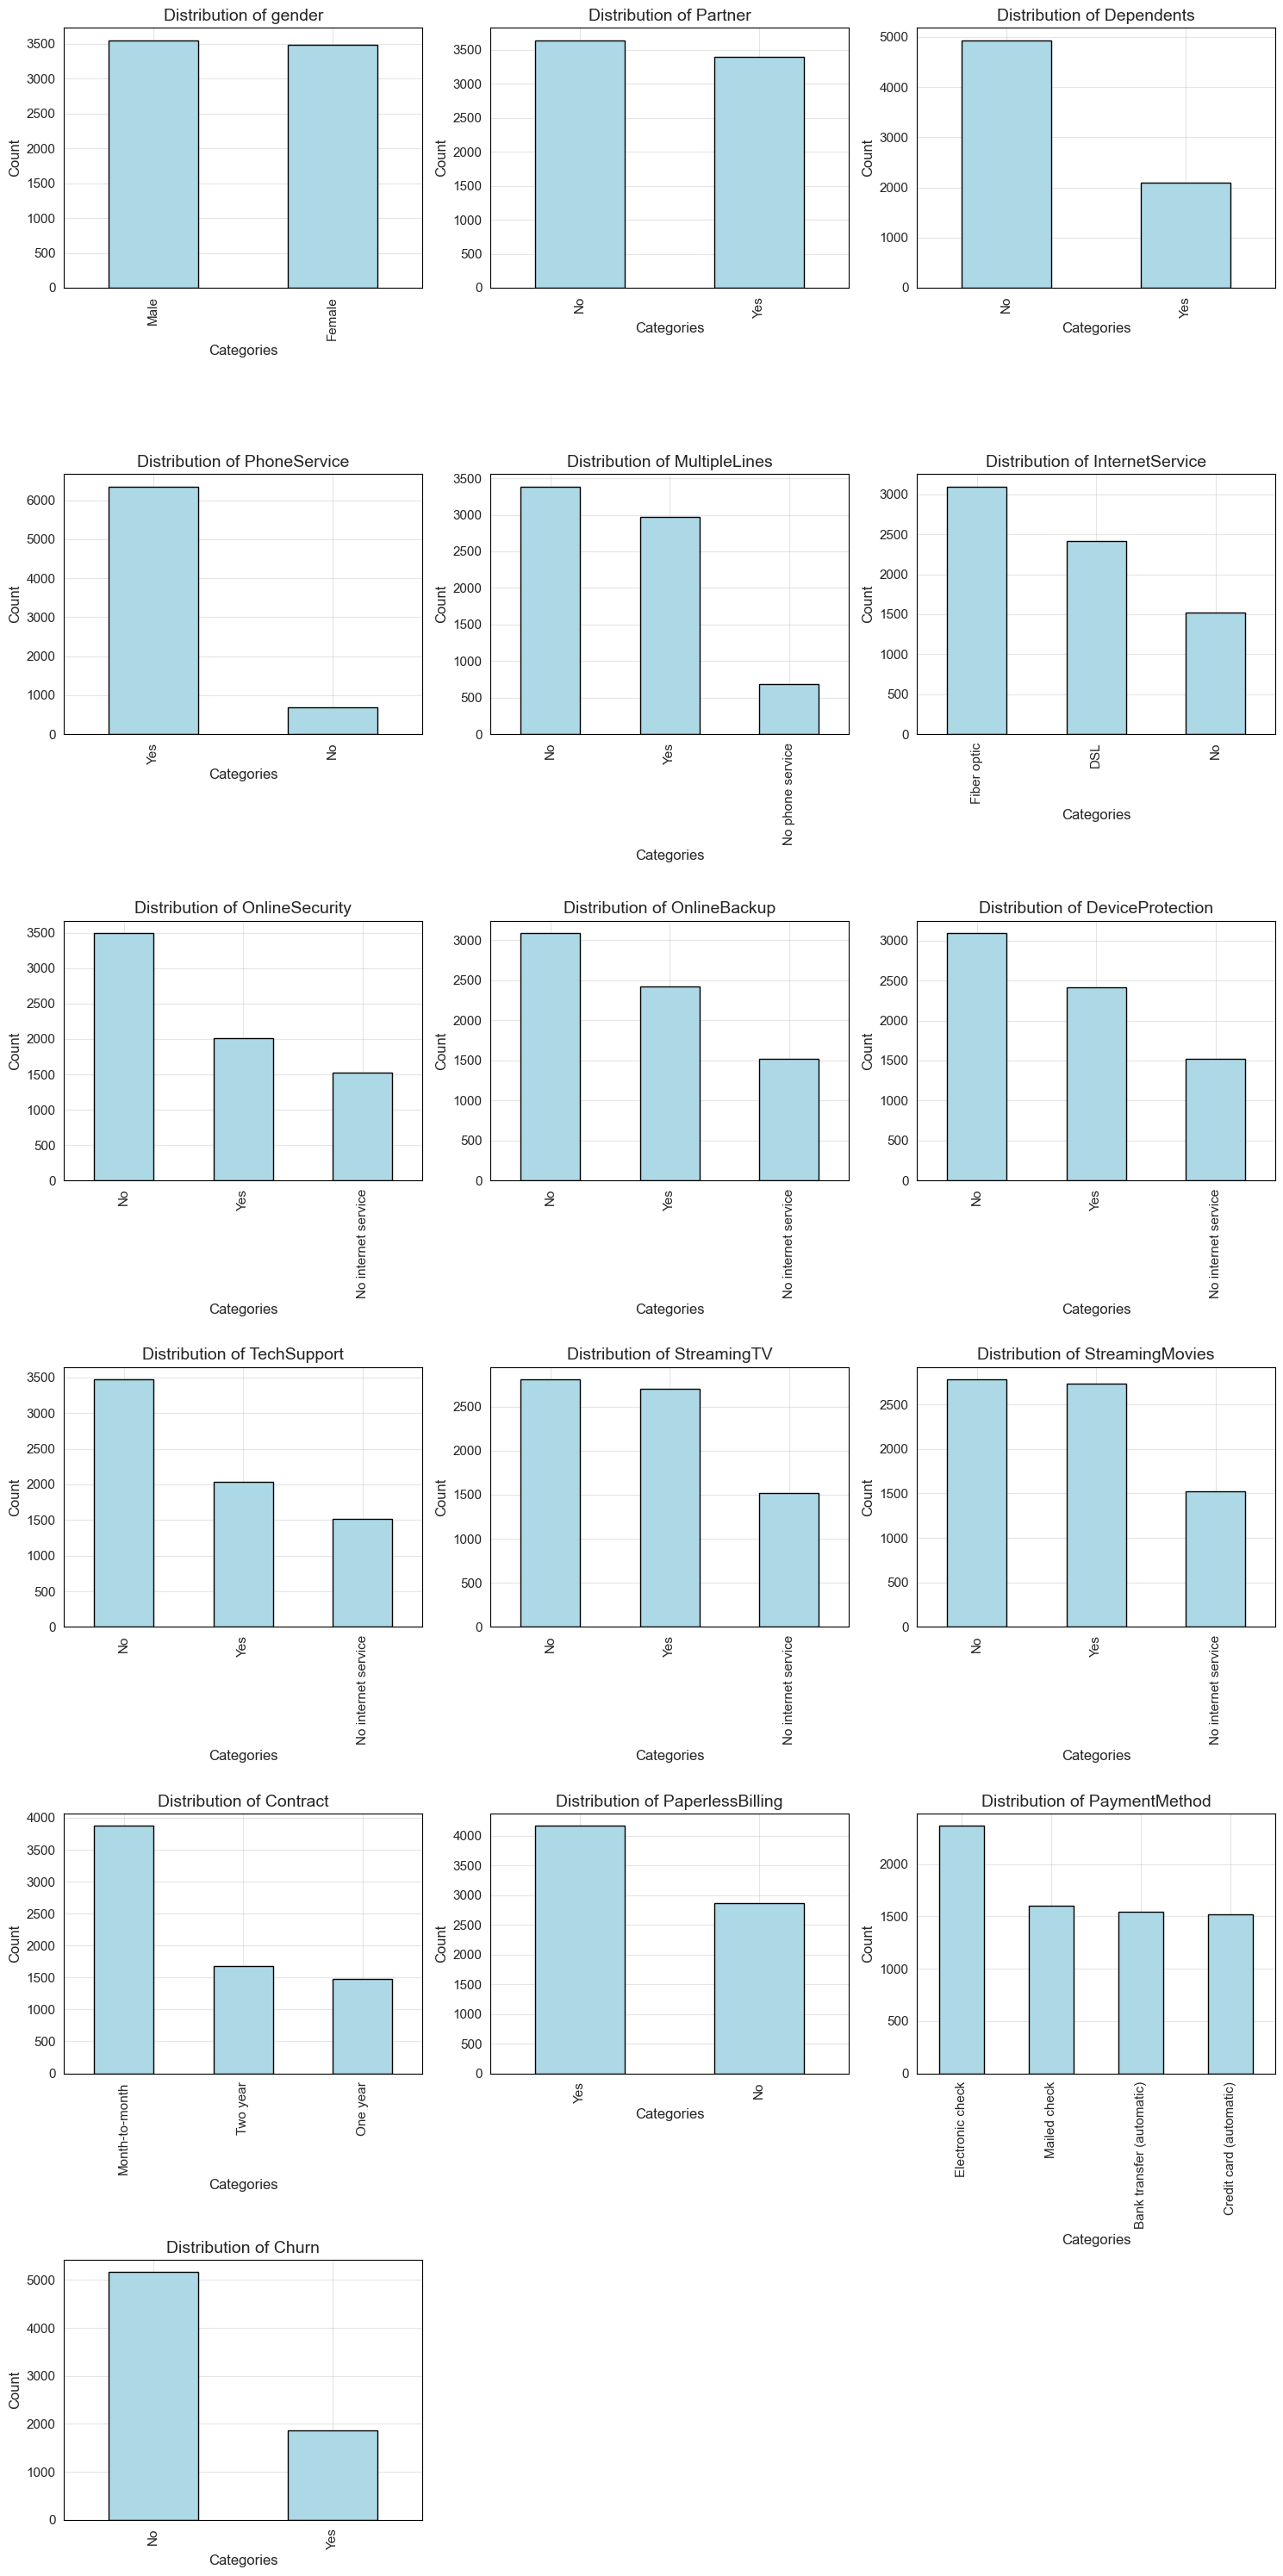

In [235]:
plot_categorical_barcharts(df, max_unique=30)

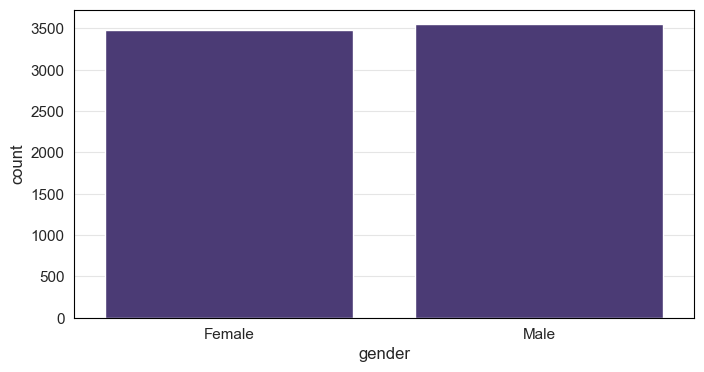

In [236]:
sns.countplot(x='gender', data=df)
plt.show()

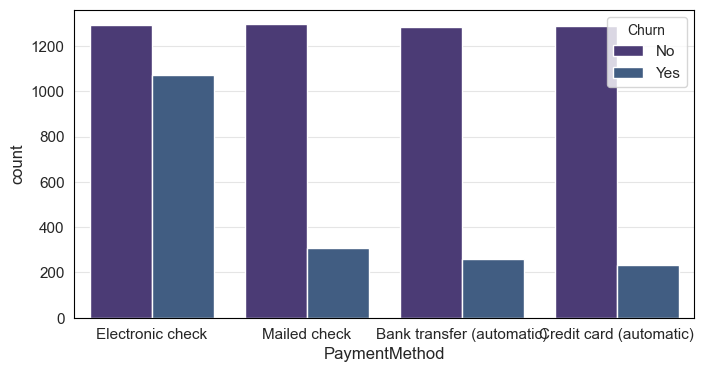

In [237]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.show()

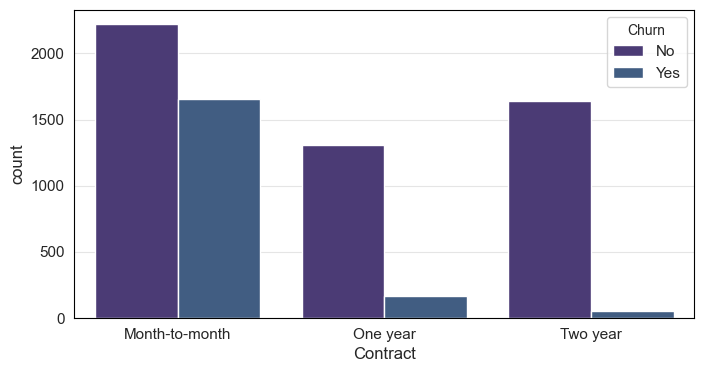

In [238]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

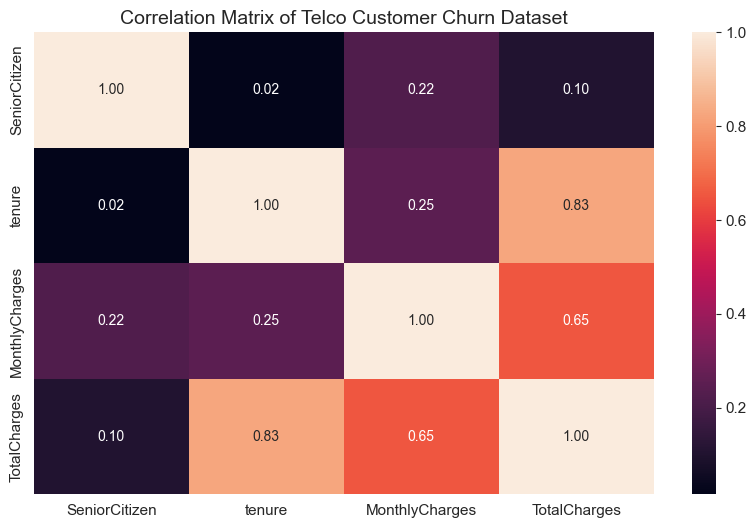

In [239]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix of Telco Customer Churn Dataset")
plt.show()

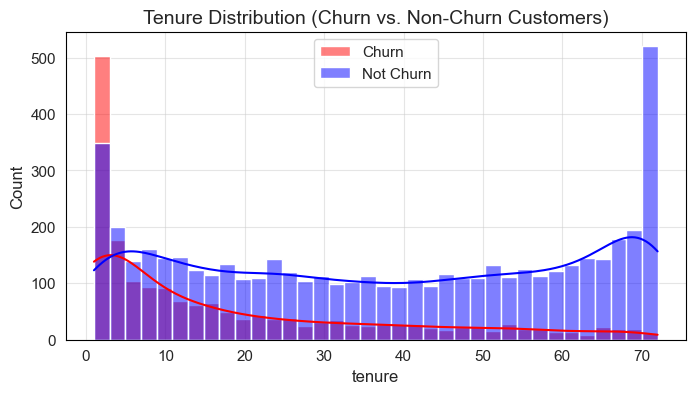

In [240]:

sns.histplot(df[df['Churn'] == 'Yes']['tenure'], color="red", label="Churn", kde=True, binwidth=2)
sns.histplot(df[df['Churn'] == 'No']['tenure'], color="blue", label="Not Churn", kde=True, binwidth=2)

plt.legend()
plt.title("Tenure Distribution (Churn vs. Non-Churn Customers)")

plt.show()


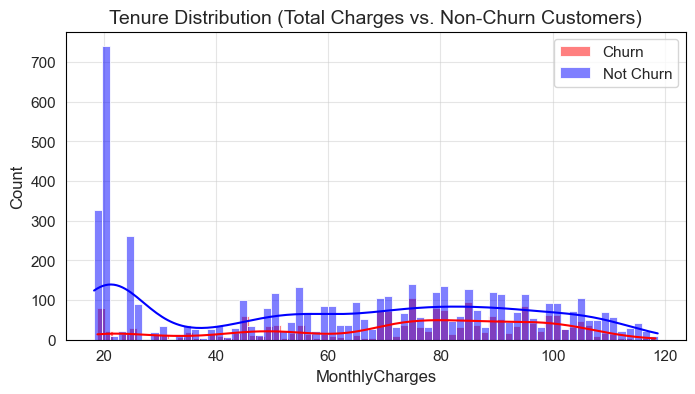

In [241]:

sns.histplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color="red", label="Churn", kde=True, bins=70)
sns.histplot(df[df['Churn'] == 'No']['MonthlyCharges'], color="blue", label="Not Churn", kde=True, bins=70)

plt.legend()
plt.title("Tenure Distribution (Total Charges vs. Non-Churn Customers)")

plt.show()


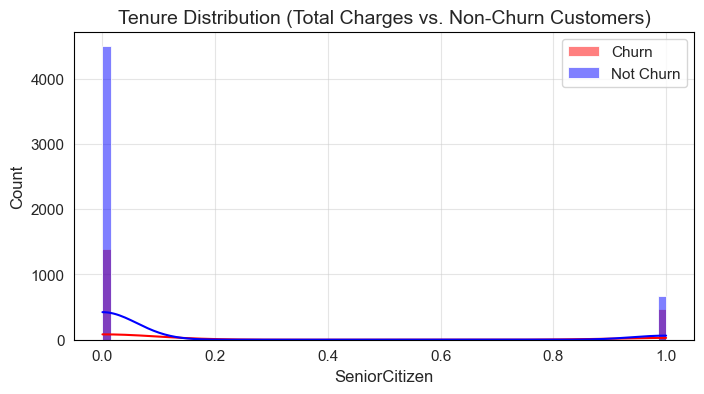

In [242]:
sns.histplot(df[df['Churn'] == 'Yes']['SeniorCitizen'], color="red", label="Churn", kde=True, bins=70)
sns.histplot(df[df['Churn'] == 'No']['SeniorCitizen'], color="blue", label="Not Churn", kde=True, bins=70)

plt.legend()
plt.title("Tenure Distribution (Total Charges vs. Non-Churn Customers)")

plt.show()

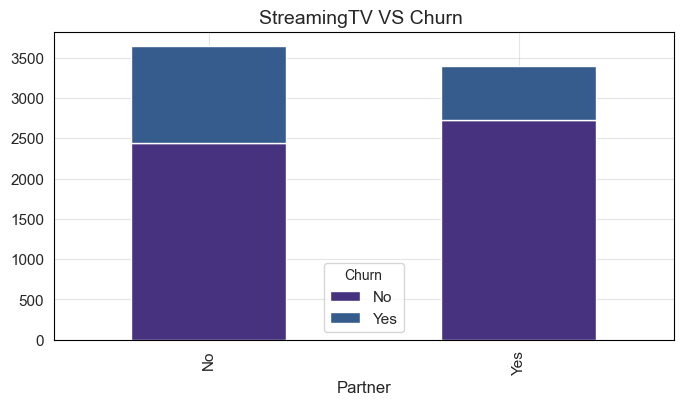

In [243]:
pd.crosstab(df['Partner'], df['Churn']).plot(kind='bar', stacked=True)
plt.title("StreamingTV VS Churn ")
plt.show()


In [244]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### <span> Data Preprocessing</span>

In [245]:
df.Churn = df.Churn.map({'Yes': 1, 'No': 0})

In [246]:
X = df[['Contract', 'InternetService', 'PaymentMethod', 'TotalCharges', 'tenure', 'OnlineSecurity', 'StreamingTV', 'PaperlessBilling', 'StreamingMovies', 'MultipleLines']]
y = df.Churn

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,stratify=y, random_state=42)

In [248]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [249]:
# Define columns for different encoding strategies
binary_cols = ['PaperlessBilling']
ordinal_cols = ['Contract', 'InternetService']
nominal_cols = ['MultipleLines', 'OnlineSecurity', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']
numeric_cols = ['TotalCharges', 'tenure']

# Define ordinal categories for ordered encoding
ordinal_mapping = [['Month-to-month', 'One year', 'Two year'],
                   ['No', 'DSL', 'Fiber optic']]

# Define transformers
binary_transformer = OneHotEncoder(drop='if_binary')  # Automatically encodes binary as 0/1
ordinal_transformer = OrdinalEncoder(categories=ordinal_mapping)
nominal_transformer = OneHotEncoder(drop='first')  # Drop first to avoid dummy variable trap
numeric_transformer = StandardScaler()  # Apply StandardScaler to numeric columns

# Apply transformations using ColumnTransformer
preprocessor = ColumnTransformer([
    ('binary', binary_transformer, binary_cols),
    ('ordinal', ordinal_transformer, ordinal_cols),
    ('nominal', nominal_transformer, nominal_cols),
    ('numeric', numeric_transformer, numeric_cols),
], remainder='passthrough')  # Keep any extra columns if needed

In [250]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [110]:
pd.DataFrame(X_train_transformed).head()

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0  1.0  1.0  1.0  1.0  0.0  2.0  2.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  1.0  0.0  1.0  0.0  2.0  2.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
3  1.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   

         14  
0  0.106135  
1  0.161463  
2  0.198446  
3 -0.799942  
4  0.826050

In [111]:
pd.DataFrame(X_train_transformed).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [251]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(8, 6))
    y_train_pred = np.array(np.where(model.predict(X_train)>0.5, 1, 0)).reshape((-1,))
    y_pred = np.array(np.where(model.predict(X_test)>0.5, 1, 0)).reshape((-1,))
    print("Train_Set")
    cfm = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cfm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Train_Set Confusion Matrix")
    plt.show()
    print(classification_report(y_train, y_train_pred))
    eval_dict_train = classification_report(y_train, y_train_pred, output_dict=True)
    print()
    print("Test_Set")
    cfm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cfm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Test_Set Confusion Matrix")
    plt.show()
    eval_dict_test = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))
    print()
    return eval_dict_train, eval_dict_test

### <span> Modeling</span>

#### <span> Logistic model</span>

In [252]:
logistic = LogisticRegression(class_weight='balanced', random_state=42)
logistic.fit(X_train_transformed , y_train)

LogisticRegression(class_weight='balanced', random_state=42)

Train_Set


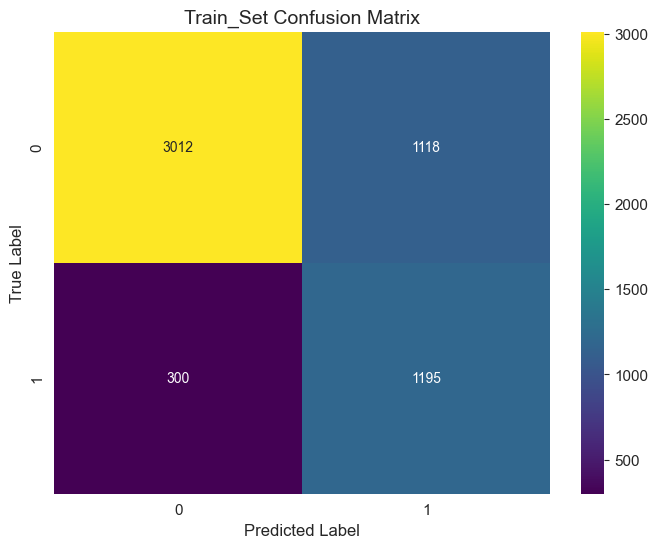

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      4130
           1       0.52      0.80      0.63      1495

    accuracy                           0.75      5625
   macro avg       0.71      0.76      0.72      5625
weighted avg       0.81      0.75      0.76      5625


Test_Set


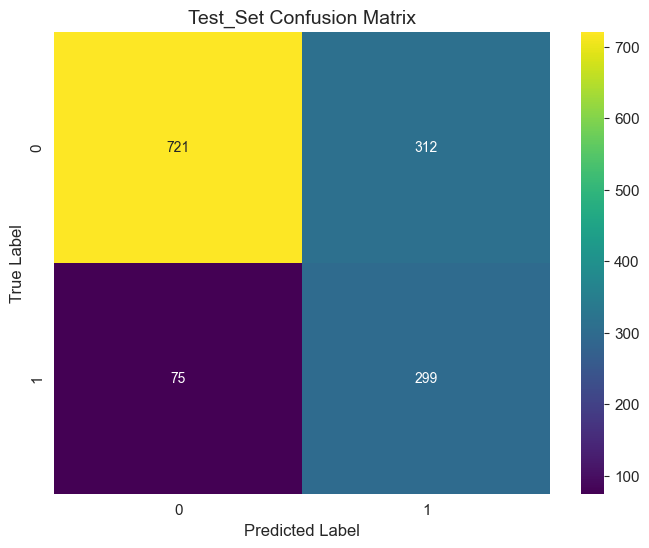

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407




In [253]:
logistic_eval_train, logistic_eval_test = eval_metric(logistic, X_train_transformed, y_train, X_test_transformed, y_test)

#### Decision Tree

In [254]:
tree = DecisionTreeClassifier( max_depth=8,random_state=42).fit(X_train_transformed, y_train)

Train_Set


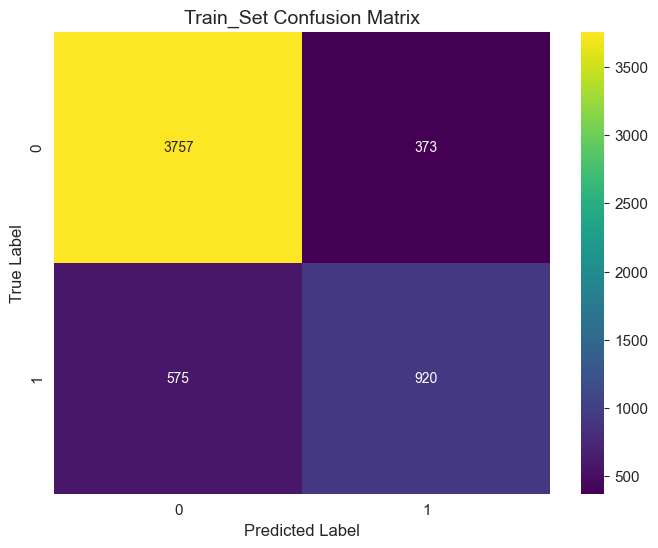

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4130
           1       0.71      0.62      0.66      1495

    accuracy                           0.83      5625
   macro avg       0.79      0.76      0.77      5625
weighted avg       0.83      0.83      0.83      5625


Test_Set


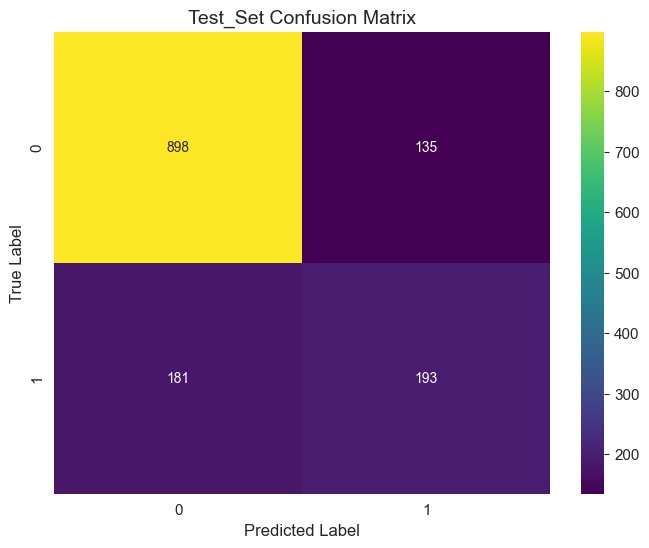

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.52      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407




In [255]:
tree_eval_train, tree_eval_test = eval_metric(tree, X_train_transformed, y_train, X_test_transformed, y_test)

#### Random Forest

In [273]:
forest = RandomForestClassifier( max_depth=10,random_state=42).fit(X_train_transformed, y_train)

Train_Set


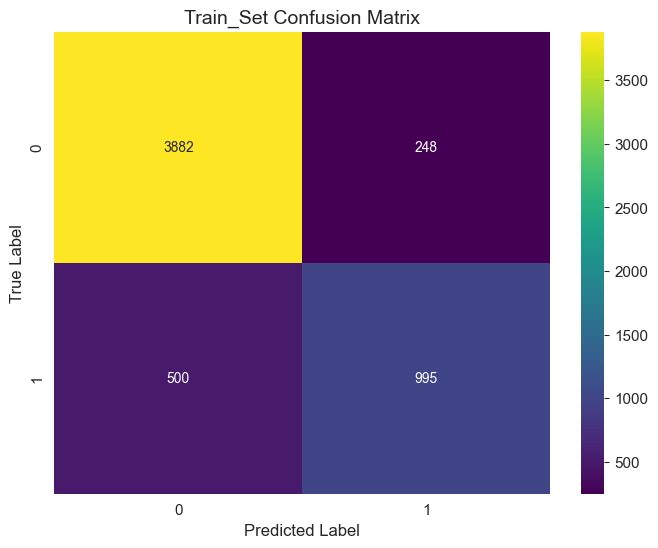

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4130
           1       0.80      0.67      0.73      1495

    accuracy                           0.87      5625
   macro avg       0.84      0.80      0.82      5625
weighted avg       0.86      0.87      0.86      5625


Test_Set


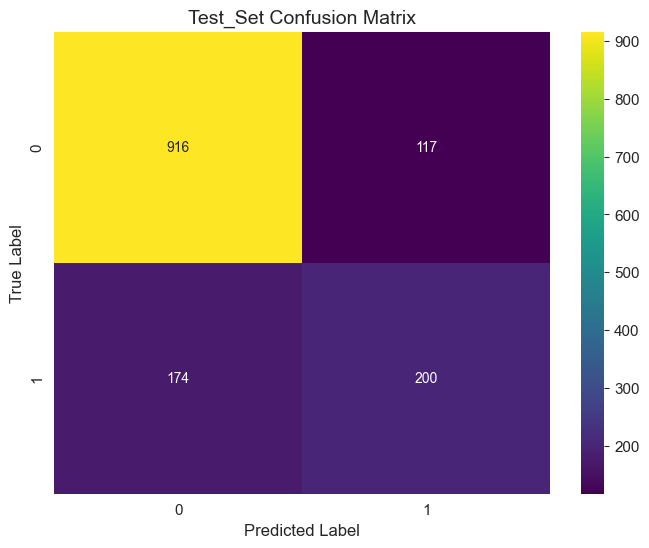

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407




In [274]:
forest_eval_train, forest_eval_test  = eval_metric(forest, X_train_transformed, y_train, X_test_transformed, y_test)

#### <span> XGBoost</span>

In [279]:
xgb = XGBClassifier(class_weight='balanced', n_estimators=100, max_depth=2).fit(X_train_transformed,y_train)

Train_Set


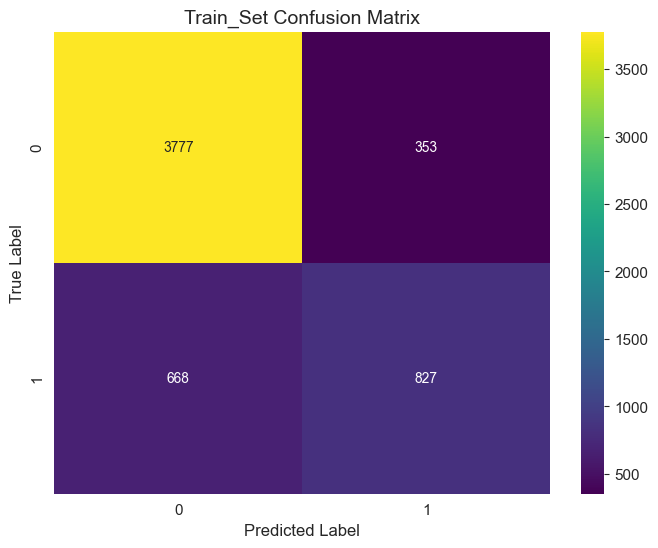

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4130
           1       0.70      0.55      0.62      1495

    accuracy                           0.82      5625
   macro avg       0.78      0.73      0.75      5625
weighted avg       0.81      0.82      0.81      5625


Test_Set


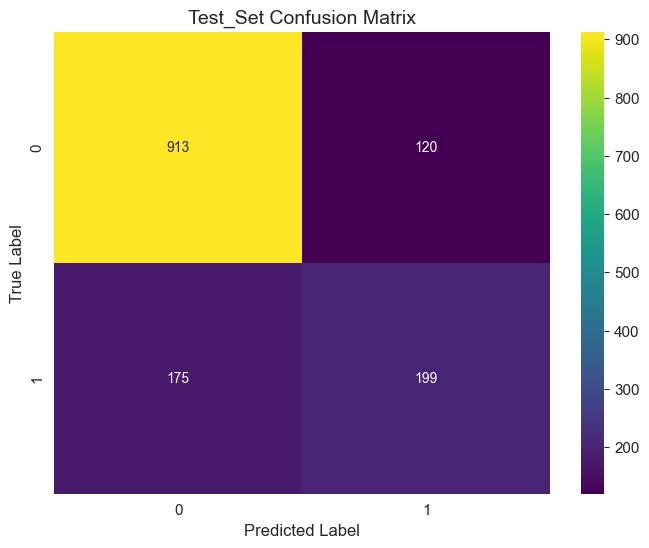

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407




In [280]:
xgb_eval_train, xgb_eval_test = eval_metric(xgb, X_train_transformed, y_train, X_test_transformed, y_test)


#### Artificial Neural Network

In [281]:

nn_model = Sequential(
    [
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)
nn_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [282]:
X_train_tens = tf.convert_to_tensor(X_train_transformed)
y_train_tens = tf.convert_to_tensor(y_train)
nn_model.fit(X_train_tens, y_train_tens, epochs = 50, batch_size=200)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7072 - loss: 0.5283  
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7910 - loss: 0.4263
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8015 - loss: 0.4213
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8012 - loss: 0.4157
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8071 - loss: 0.4066
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8064 - loss: 0.4182
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8143 - loss: 0.4061
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8125 - loss: 0.4019
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8148 - loss: 0.4070
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8236 - loss: 0.3828
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8120 - loss: 0.

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train_Set


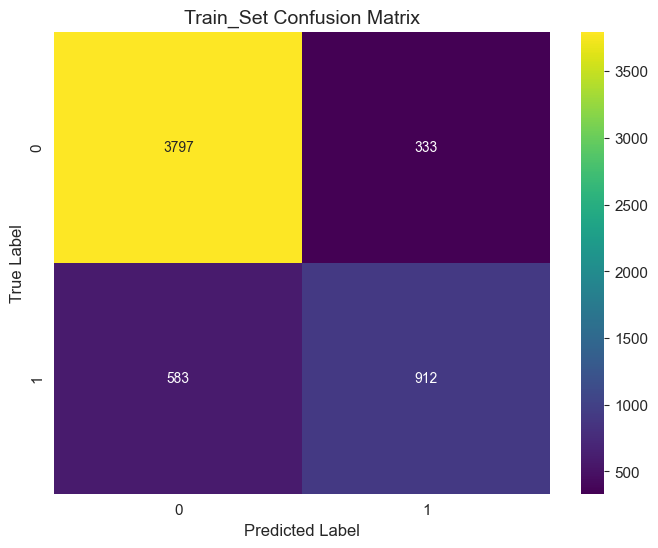

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4130
           1       0.73      0.61      0.67      1495

    accuracy                           0.84      5625
   macro avg       0.80      0.76      0.78      5625
weighted avg       0.83      0.84      0.83      5625


Test_Set


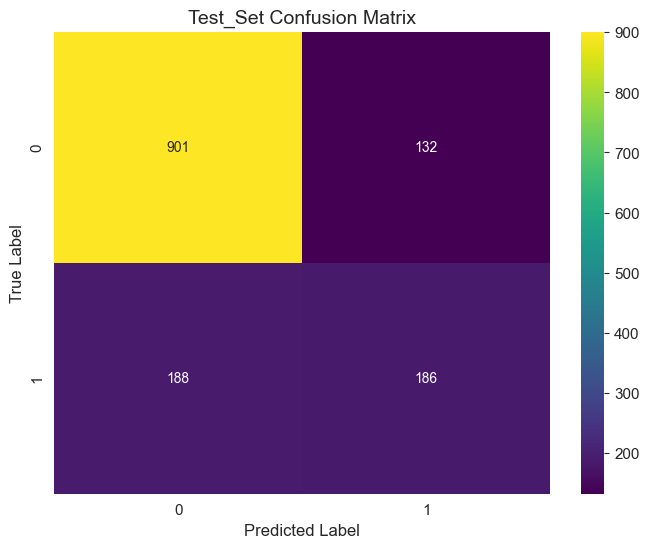

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407




In [283]:
nn_model_eval_train, nn_model_eval_test = eval_metric(nn_model, X_train_transformed, y_train, X_test_transformed, y_test)


### Comparing Models

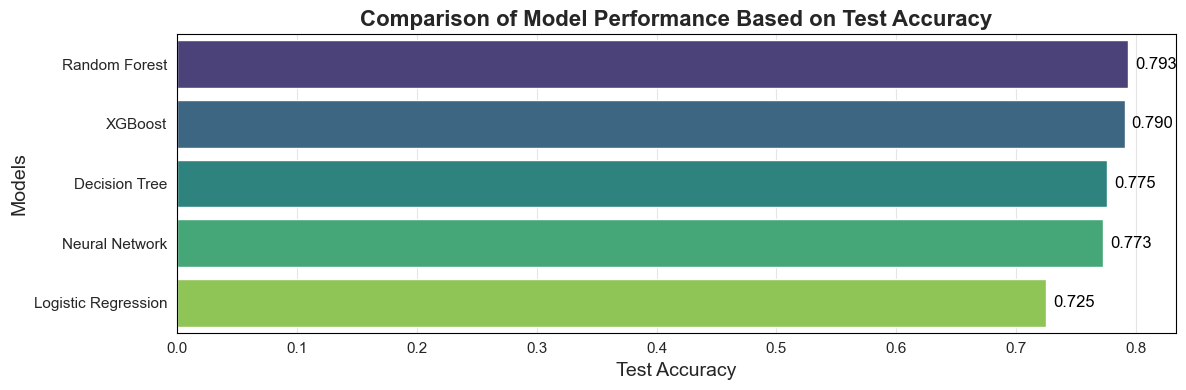

In [284]:
compare = pd.DataFrame({
    "Model": ["Logistic Regression","Decision Tree", "Random Forest", "XGBoost", "Neural Network"],
    "Accuracy": [logistic_eval_test['accuracy'], tree_eval_test['accuracy'], forest_eval_test['accuracy'], xgb_eval_test['accuracy'], nn_model_eval_test['accuracy']]
})


compare = compare.sort_values(by="Accuracy", ascending=False)


plt.figure(figsize=(12, 4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="viridis")


for p in ax.patches:
    ax.annotate(f"{p.get_width():.3f}", 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2), 
                xytext=(5, 0), textcoords='offset points', ha="left", va="center", size=12, color='black')



plt.title("Comparison of Model Performance Based on Test Accuracy", size=16, weight='bold')
plt.xlabel('Test Accuracy', size=14)
plt.ylabel('Models', size=14)


plt.tight_layout()
plt.show()



### Final Model

In [289]:
import pickle
final_model=forest

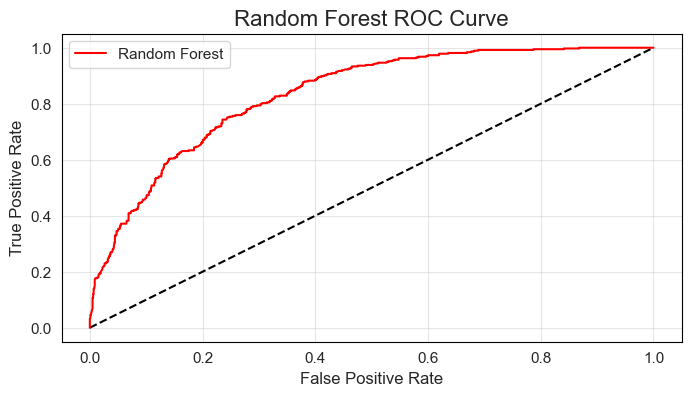

In [290]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, xgb.predict_proba(X_test_transformed)[:, 1])
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

In [291]:
pickle.dump(final_model, open("model.pkl", "wb"))
pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))